In [42]:
import math
#Read the dataset
transactions = []

with open("transactions.csv", "r") as f:
    for line in f:
        line = line.strip().split(',')
        transaction = [float(line[0]), float(line[1]), int(line[2])]
        transactions.append(transaction)

transactions


[[2.1, 6.4, 1],
 [3.8, 2.2, 1],
 [15.7, 4.4, 1],
 [26.7, 4.6, 1],
 [10.7, 4.9, 1],
 [11.3, 5.1, 1],
 [120.7, 3.1, 1],
 [140.3, 4.1, 1],
 [30.0, 5.1, 1],
 [45.0, 4.2, 1],
 [80.0, 3.7, 1],
 [20.0, 5.2, 1],
 [100.0, 4.0, 1],
 [80.0, 4.0, 1],
 [70.0, 1.5, 1],
 [40.0, 1.0, 0],
 [100.0, 2.0, 0],
 [40.0, 2.7, 0],
 [63.0, 1.5, 0],
 [0.7, 1.2, 0],
 [0.5, 0.8, 0],
 [0.8, 1.5, 0],
 [0.2, 1.1, 0],
 [0.1, 0.8, 0],
 [20.0, 2.2, 0],
 [60.0, 2.1, 0],
 [105.0, 0.4, 0],
 [10.0, 1.2, 0],
 [15.0, 1.7, 0],
 [12.0, 1.0, 0]]

In [43]:
def euclidean(instance1, instance2):
    dist = 0.0
    for i in range(len(instance1)):
        dist += (instance1[i] - instance2[i]) ** 2
    return math.sqrt(dist)

print(euclidean([2.0, 3.0], [1.0, 1.0]))  # Sample calculation

2.23606797749979


In [52]:
#Implement k-NN algorithm
def get_distances(data, query):
    distances = []
    for i, instance in enumerate(data):  #Enumerate loops over a list while keeping track of indexes of current items
        dist = euclidean(instance[:-1], query) #-1 removes the last value, so mass and height are compared
        distances.append((dist, i))  
    distances.sort() 
    return distances

def knn_estimate(data, query, k=5):
    distances = get_distances(data, query)
    
    votes = {}
    for i in range(k):
        idx = distances[i][1]  
        label = data[idx][-1]  
        votes[label] = votes.get(label, 0) + 1
    
    return max(votes, key=votes.get)

##
query = [30,2,-1]
print(get_distances(transactions, query))

print(knn_estimate(transactions, [30,2], k=5))
print(knn_estimate(transactions, [30,2], k=5))
print(knn_estimate(transactions, [200,6]))


[(3.0999999999999996, 8), (4.201190307520001, 3), (10.00199980003999, 24), (10.024470060806207, 17), (10.04987562112089, 15), (10.49952379872535, 11), (14.5, 2), (15.002999700059986, 28), (15.16047492659778, 9), (18.027756377319946, 29), (18.95521036549054, 5), (19.51665955024066, 4), (20.015993605114886, 27), (26.200763347658402, 1), (28.244822534404424, 0), (29.204280508172086, 21), (29.31091946698363, 19), (29.524396691549857, 20), (29.813587506370315, 22), (29.924070578716393, 23), (30.000166666203707, 25), (33.0037876614185, 18), (40.00312487793922, 14), (50.02889165272403, 10), (50.039984012787215, 13), (70.0, 16), (70.02856560004639, 12), (75.01706472530101, 26), (90.70667009652597, 6), (110.31998912255204, 7)]
0
0
1


In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_table("fruit_data.txt")

X = df[['mass', 'height']]  
y = df['fruit_name']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #20% of data is used for testing, 80% for training

X_train


,mass,height
36,160,7.6
31,210,8.0
8,178,7.8
17,168,7.6
6,80,4.3
4,84,4.6
54,116,8.5
19,162,7.2
30,158,7.5
50,130,8.2


In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [47]:
knn.score(X_test,y_test)

0.5833333333333334

In [48]:
query = pd.DataFrame([[21, 5.4]], columns=['mass', 'height'])

prediction = knn.predict(query)

prediction

array(['mandarin'], dtype=object)

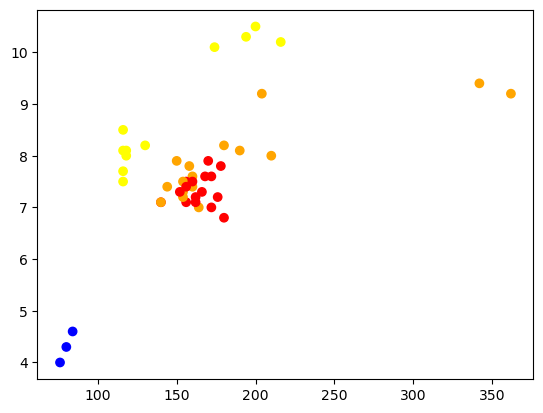

In [49]:
import matplotlib.pyplot as plt
colors_map = {'apple': 'red', 'mandarin': 'blue', 'orange':'orange', 'lemon':'yellow'}
colors = [colors_map[c] for c in y_train]
plt.scatter(X_train.mass, X_train.height, c = colors)

In [50]:
#Task: Use the housing prices dataset "Housing.csv" to create kNN model to predict house prices
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

df = pd.read_csv("Housing.csv")

#print(df.head())

X = df[['area', 'bedrooms', 'bathrooms', 'stories']]  
y = df['price']  # Target column (house price)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #20% of dataset will be set aside as test set

knn = KNeighborsRegressor(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Predicted prices:", y_pred)

Predicted prices: [3885000. 6412000. 3722600. 4982600. 4060000. 4885300. 5710600. 4982600.
 3502100. 3402000. 7455000. 4501000. 4004000. 3309600. 4060000. 3197600.
 3228400. 6456800. 3794000. 6456800. 5010600. 5444600. 3654000. 4046000.
 5171600. 4893000. 3309600. 3612000. 5598600. 3028200. 4156600. 3288600.
 7579600. 6510000. 5114200. 4914000. 4305000. 3514000. 3017000. 4379200.
 5314400. 3197600. 6522600. 4368000. 5242300. 3654000. 7306600. 4305000.
 5538400. 3154200. 9189600. 3154200. 5775000. 3596600. 3598000. 3669400.
 4515000. 2825200. 6060600. 4046000. 3514000. 3634400. 6522600. 3927000.
 4207000. 4004000. 6914600. 3612000. 6258000. 4494000. 3666600. 5318600.
 5710600. 5159000. 3241000. 5185600. 3197600. 5378800. 6456800. 4228000.
 5318600. 4088000. 5474000. 5532100. 2989000. 5481000. 4379200. 3643500.
 7245000. 7037800. 3143000. 5538400. 4440800. 3935400. 7455000. 3640000.
 4074000. 4431000. 5157600. 6384000. 3502100. 4914000. 3472000. 3815700.
 6456800. 5394200. 7133000. 64568